# SMS Spam Classifier : Bernouli Naive Bayes

In [1]:
## lets read the dataset

import pandas as pd

docs = pd.read_table('SMSSpamCollection',header=None,names=['Class','sms'])
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
## lets see the dataset shape
docs.shape

(5572, 2)

In [3]:
## lets look at number of spam and ham messages
docs.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [4]:
## lets change the class labels to numerical values
docs.Class = docs.Class.map({'ham':0,'spam':1})
docs.Class.head()

0    0
1    0
2    1
3    0
4    0
Name: Class, dtype: int64

In [5]:
## spam rate
print("Spam rate is about {}%".format(docs.Class.value_counts()[1]/docs.shape[0]*100))

Spam rate is about 13.406317300789663%


In [6]:
docs.Class.value_counts()[1]/docs.shape[0]*100

13.406317300789663

In [7]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Class    5572 non-null int64
sms      5572 non-null object
dtypes: int64(1), object(1)
memory usage: 87.1+ KB


In [8]:
## lets rename the Class column from the frame to label
docs = docs.rename(columns={"Class":'label'})
docs.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
X = docs.sms
y = docs.label

### Train Test Split

In [10]:
## splitting into test train 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=1)


C:\Users\Sameer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
X_train.head()

1642    Hi , where are you? We're at  and they're not ...
2899          If you r @ home then come down within 5 min
480     When're you guys getting back? G said you were...
3485    Tell my  bad character which u Dnt lik in me. ...
157                           I'm leaving my house now...
Name: sms, dtype: object

In [12]:
y_train.head()

1642    0
2899    0
480     0
3485    0
157     0
Name: label, dtype: int64

In [13]:
## printing the shapes of X_train and X_test
print("Train shape ", X_train.shape)
print("Test shape ", X_test.shape)

Train shape  (4457,)
Test shape  (1115,)


## BOW Vectorising

In [14]:
## lets now represent each sms in BOW style removig the stop words

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')

In [15]:
# lets fit it on x_train to learn the feature names
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
## lets see the learnt vocab

vect.vocabulary_

{'hi': 3324,
 'keen': 3792,
 'kind': 3825,
 'feel': 2722,
 'shouldn': 5898,
 'tomo': 6698,
 'don': 2356,
 'mind': 4349,
 'home': 3368,
 'come': 1861,
 'min': 4346,
 'guys': 3188,
 'getting': 3028,
 'said': 5675,
 'thinking': 6600,
 'staying': 6218,
 'mcr': 4270,
 'tell': 6517,
 'bad': 1171,
 'character': 1692,
 'dnt': 2325,
 'lik': 3990,
 'll': 4038,
 'try': 6792,
 'change': 1684,
 'lt': 4125,
 'gt': 3164,
 'add': 812,
 'tat': 6478,
 'new': 4606,
 'year': 7401,
 'resolution': 5538,
 'waiting': 7083,
 'ur': 6925,
 'reply': 5518,
 'frank': 2880,
 'good': 3087,
 'morning': 4450,
 'leaving': 3946,
 'house': 3409,
 'hey': 3320,
 'watching': 7127,
 'movie': 4465,
 'tonight': 6706,
 'prob': 5236,
 'early': 2450,
 'da': 2096,
 'al': 896,
 'camera': 1586,
 'awarded': 1143,
 'sipix': 5949,
 'digital': 2270,
 '09061221066': 188,
 'fromm': 2926,
 'landline': 3891,
 'delivery': 2191,
 '28': 376,
 'days': 2136,
 'fyi': 2959,
 'gonna': 3085,
 'sporadically': 6167,
 'starting': 6209,
 'like': 3991,
 '

In [17]:
len(vect.vocabulary_.keys())

7457

In [18]:
## transforming the sparse matrices to compressed sparse matrix notation
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [19]:
print(X_train_transformed)
## (document_no, feature/word_no)  occurence

  (0, 2356)	1
  (0, 2722)	1
  (0, 3324)	1
  (0, 3792)	1
  (0, 3825)	1
  (0, 4349)	1
  (0, 5898)	1
  (0, 6698)	1
  (1, 1861)	1
  (1, 3368)	1
  (1, 4346)	1
  (2, 3028)	1
  (2, 3188)	1
  (2, 4270)	1
  (2, 5675)	1
  (2, 6218)	1
  (2, 6600)	1
  (3, 812)	1
  (3, 1171)	1
  (3, 1684)	1
  (3, 1692)	1
  (3, 2325)	1
  (3, 2880)	1
  (3, 3087)	1
  (3, 3164)	1
  :	:
  (4454, 4030)	1
  (4454, 4581)	1
  (4454, 5423)	1
  (4454, 6412)	1
  (4454, 7385)	1
  (4455, 262)	1
  (4455, 315)	1
  (4455, 367)	1
  (4455, 862)	1
  (4455, 2127)	1
  (4455, 2808)	1
  (4455, 3724)	1
  (4455, 3762)	1
  (4455, 4287)	1
  (4455, 4476)	1
  (4455, 4951)	1
  (4455, 5428)	1
  (4455, 5518)	1
  (4455, 5687)	1
  (4455, 5824)	1
  (4455, 6549)	1
  (4455, 6603)	1
  (4455, 6684)	1
  (4456, 1706)	1
  (4456, 6028)	1


## Building

In [21]:
## training the multinomial naive bayes model 
## Bernoulli NB converts the count representation to existential representation internally, thats why we use BOW represenatation itself

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit
bnb.fit(X_train_transformed,y_train)

#predict class
y_pred_class = bnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = bnb.predict_proba(X_test_transformed)



In [22]:
## alpha 1 for laplace smoothing used
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [23]:
## predictions count
pd.Series(y_pred_class).value_counts()

0    991
1    124
dtype: int64

In [24]:
## actual predictions count
y_test.value_counts()

0    968
1    147
Name: label, dtype: int64

Very close number of predictions happened

## Evaluating the model

In [25]:
## printing the accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9775784753363229

In [26]:
## confusion matrix
confusion = metrics.confusion_matrix(y_test,y_pred_class)
confusion

array([[967,   1],
       [ 24, 123]], dtype=int64)

In [27]:
TN = confusion[0,0]
TP = confusion[1,1]
FN = confusion[1,0]
FP = confusion[0,1]

In [28]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

print("sensitivity:", sensitivity)
print("specificity: ",specificity)

sensitivity: 0.8367346938775511
specificity:  0.9989669421487604


##### We donot want to specify a non-spam as spam i.e., FP should be less, specificity should be as high as possible. We see that its 99.89% which is very decent!

In [29]:
precision = TP/(TP+FP)

print("precision is: ",precision)

precision is:  0.9919354838709677


In [30]:
print("Recall Score: ",metrics.recall_score(y_test,y_pred_class))
print("F1 Score: ",metrics.f1_score(y_test,y_pred_class))

Recall Score:  0.8367346938775511
F1 Score:  0.9077490774907749


#### ROC Curve

In [31]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

FPR,TPR,thresholds = roc_curve(y_test,y_pred_proba[:,1])  ##giving positive class probabilities only
roc_auc = auc(FPR,TPR)
roc_auc

0.9973295103165233

In [32]:
pd.DataFrame({'Threshold': thresholds,'TPR':TPR,'FPR':FPR})

,Threshold,TPR,FPR
0,1.000000e+00,0.278912,0.000000
1,1.000000e+00,0.292517,0.000000
2,1.000000e+00,0.299320,0.000000
3,1.000000e+00,0.312925,0.000000
4,1.000000e+00,0.326531,0.000000
5,1.000000e+00,0.353741,0.000000
6,9.972904e-01,0.727891,0.000000
7,9.966232e-01,0.727891,0.001033
8,9.937722e-01,0.748299,0.001033
9,9.932303e-01,0.761905,0.001033


Text(0.5,1,'ROC')

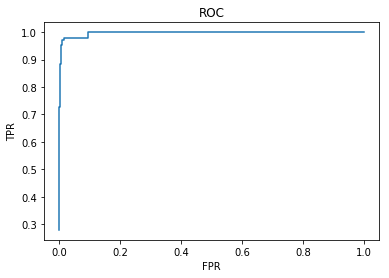

In [33]:
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")